In [48]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.lda import LDA
from sklearn.qda import QDA


Automatically created module for IPython interactive environment


In [49]:
# prepare classifiers


names = ["Logistic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "Adaboost", "Naive Bayes", "LDA", "QDA"]
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="rbf", gamma=2, C=1), # GridSearchCV() can be used to find the optimal gamma and C 
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LDA(),
    QDA()
    ]

In [54]:
# prepare datasets
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0), # make two interleaving half circles 
            make_circles(noise=0.2, factor=0.5, random_state=1), # make a large circle containing a smaller circle in 2d
            linearly_separable]

### Adaboost
For any distribution, with high probability, given polynomially many examples and polynomial time we can find a classifier with 
generalization error better than random guessing. i.e. error < 0.5

Given this assumption, we can use boosting to generate a single weighted classifier which correctly classifies our training data at 99%-100%. 


More at [this material](http://math.mit.edu/~rothvoss/18.304.3PM/Presentations/1-Eric-Boosting304FinalRpdf.pdf)

### RBF kernel SVM


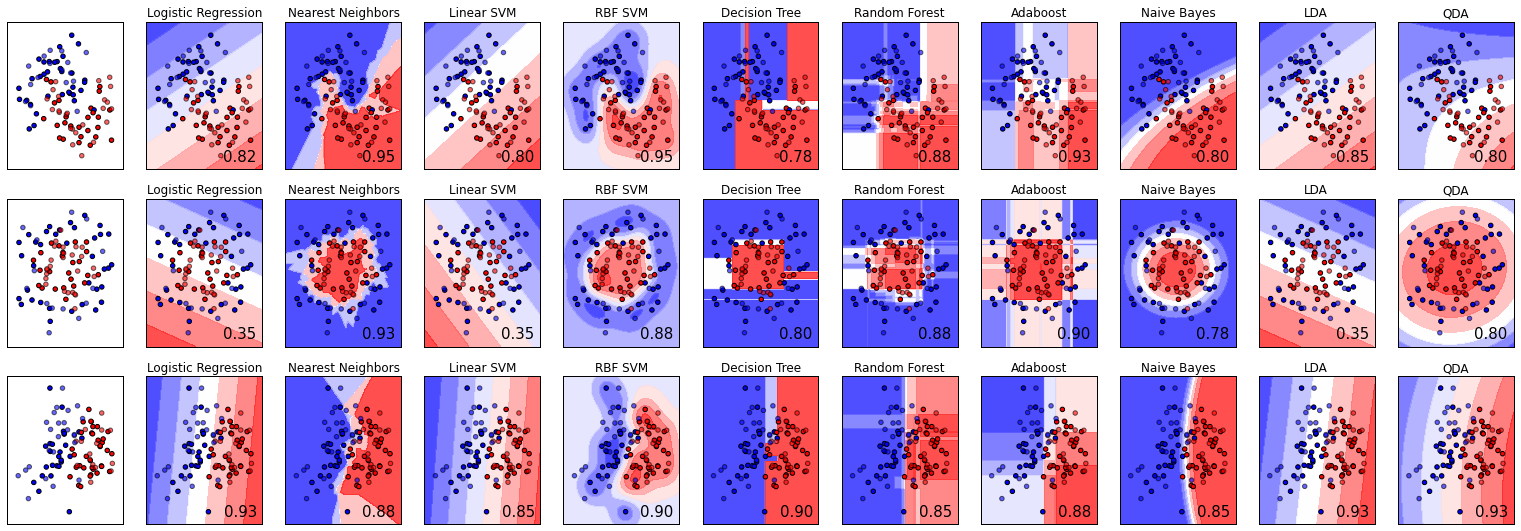

In [55]:
%matplotlib inline
figure = plt.figure(figsize=(27, 9))
i = 1
h = 0.02 # step size in the mesh
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test 
    X, y = ds 
    X = StandardScaler().fit_transform(X) # good practice: always normalize
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    
    # get metric for plotting
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    
    cm = plt.cm.bwr # More options at : http://matplotlib.org/examples/color/colormaps_reference.html
    cm_bright = ListedColormap(["#0000FF", "#FF0000"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        
        # Plot the decision boundary
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
        # add training and test data points to the plot
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - 0.3, yy.min() + 0.3, ('%.2f' % score), size=15, horizontalalignment='right')
        
        i += 1
    
plt.show()
                         

In [44]:
xxx ,yyy = np.meshgrid(np.arange(10), np.arange(10, 12))
print xxx, yyy

print xxx.ravel(), yyy.ravel()
print np.c_[xxx.ravel(), yyy.ravel()]

[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]] [[10 10 10 10 10 10 10 10 10 10]
 [11 11 11 11 11 11 11 11 11 11]]
[[ 0.28262712  0.67205882]
 [ 0.34830508  0.9       ]] 10
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9] [10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11]
[[ 0 10]
 [ 1 10]
 [ 2 10]
 [ 3 10]
 [ 4 10]
 [ 5 10]
 [ 6 10]
 [ 7 10]
 [ 8 10]
 [ 9 10]
 [ 0 11]
 [ 1 11]
 [ 2 11]
 [ 3 11]
 [ 4 11]
 [ 5 11]
 [ 6 11]
 [ 7 11]
 [ 8 11]
 [ 9 11]]
